In [102]:
%matplotlib inline
import os
import subprocess
from scipy.stats.mstats import gmean
from __future__ import division

In [38]:
# Test the agent against all the different maps in 'map'.
def testmaps():
    test = []

    for filename in os.listdir('map'):
        result = subprocess.check_output('./agent '+ './map/' + filename, shell=True)
        test.append(int(result))

    return test

In [39]:
# Builds the executable
def make(strategy):
    return subprocess.check_output(
     "g++ main.cpp environment.cpp agent.cpp evaluator.cpp random_num_gen.cpp -o agent -fpermissive " + strategy,
     shell=True
    )

In [40]:
# Measures the goodness of a solution
standard_results = [454, 617, 504, 512, 379, 589, 597, 217]

def goodness(results):
    proportions = [a/b for a,b in zip(results,standard_results)]
    return gmean(proportions)

## Estrategia: Random

Escoje aleatoriamente una acción entre las cuatro.

In [41]:
make("")

''

In [42]:
print testmaps()
print goodness(testmaps())

[454, 617, 504, 512, 379, 589, 597, 217]
1.0


## Estrategia: Casi aleatoriamente

Aleatoriamente, pero omitiendo la acción de observar.

In [70]:
make("-DRANDOMLY")
print testmaps()
print goodness(testmaps())

[660, 365, 400, 653, 770, 406, 417, 503]
1.08871093732


## Estrategia: Paredes

Evita caminar contra una pare y evita en lo posible girar hacia donde luego encontrará una pared.

In [63]:
make("-DWALLS")

''

In [64]:
print testmaps()
print goodness(testmaps())

[793, 954, 332, 851, 1077, 867, 727, 477]
1.54879286429


## Estrategia: Mapa

Primera estrategia determinista. Consulta la memoria para extraer de los sitios donde lleva tiempo sin hacerlo, para evitar chocar contra paredes y para girar. Primer caso determinista.

In [109]:
make("-DMAP")
print testmaps()
print goodness(testmaps())

[2604, 1296, 2723, 1379, 1349, 2750, 1211, 2898]
4.09403802083


### Estudio del factor `SUFICIENTE_TRUFA`

La constante `SUFICIENTE_TRUFA` determina cuándo el agente cree que ha crecido suficiente trufa para ser recolectada. Lo que hará será empezar a recolectar una vez haya suficiente. La variación de esta constante variará la frecuencia con la que se recolecta.

Un factor razonable es `10.000`, porque se llega a él en el tiempo esperado de crecimiento de una trufa con crecimiento del `p = 1.5`. Pero probar valores por encima y por debajo puede ser interesante. Se presenta una gráfica con la variación de la bondad según la variación de esta constante.

In [93]:
make("-DMAP -DSUFICIENTE_TRUFA=" + str(4000))
print goodness(testmaps())

4.09403802083


In [107]:
from pylab import *
x = linspace(0,20000,41)
y = []
for xi in x:
    make("-DMAP -DSUFICIENTE_TRUFA=" + str(xi))
    y.append(goodness(testmaps())) 

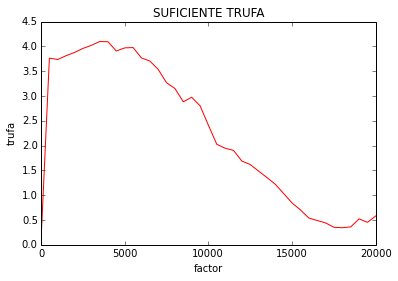

In [106]:
figure()
plot(x, y, 'r')
xlabel('factor')
ylabel('trufa')
title('SUFICIENTE TRUFA')
show()

Obtenemos que el valor general más razonable para `SUFICIENTE_TRUFA` está alrededor de los `4000`.